| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./2.MODELOS_DE_SUAVIZAMIENTO.ipynb)| [⏩](./4.OTROS_METODOS.ipynb)|

# **3. ARIMA**

## **Filtros lineales**

Los modelos ARIMA (Autoregressive Integrated Moving Average) son modelos estadísticos utilizados para analizar y predecir series de tiempo. Un componente importante de los modelos ARIMA son los filtros lineales, que se utilizan para modelar la componente autoregresiva y la componente de media móvil de la serie de tiempo.

En un modelo ARIMA, el filtro lineal se aplica a la serie de tiempo para eliminar la componente autoregresiva y la componente de media móvil, dejando un residuo estacionario. El filtro lineal se basa en la idea de que la serie de tiempo se puede representar como una combinación lineal de sus valores pasados y presentes, y se define mediante los parámetros del modelo ARIMA.

Vamos a realizar un ejemplo de cómo aplicar un filtro lineal utilizando el paquete `statsmodels` en Python. Supongamos que tenemos una serie de tiempo llamada `serie_tiempo`:

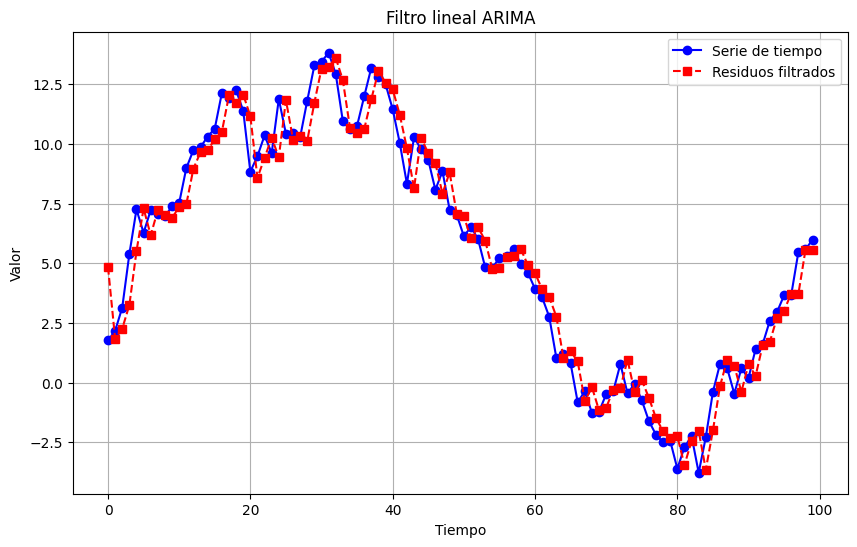

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Crear una serie de tiempo sintética
np.random.seed(0)
n = 100
valores = np.random.randn(n).cumsum()
serie_tiempo = pd.Series(valores)

# Aplicar el filtro lineal ARIMA
modelo_arima = ARIMA(serie_tiempo, order=(1, 0, 1))
modelo_fit = modelo_arima.fit()

# Obtener los residuos filtrados
residuos = modelo_fit.fittedvalues

# Graficar la serie de tiempo original y los residuos filtrados con personalización
plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo, marker='o', linestyle='-', color='b', label='Serie de tiempo')
plt.plot(residuos, marker='s', linestyle='--', color='r', label='Residuos filtrados')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Filtro lineal ARIMA')

# Personalizaciones adicionales
plt.grid(True)  # Mostrar cuadrícula

# Mostrar la leyenda en la mejor posición
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()

En este ejemplo, creamos una serie de tiempo sintética utilizando valores aleatorios generados por la función `np.random.randn` y los acumulamos utilizando `cumsum`. Luego, aplicamos el filtro lineal ARIMA utilizando el orden del modelo (1, 0, 1), que indica un modelo ARIMA con un componente autoregresivo de orden 1 y un componente de media móvil de orden 1.

El método `fit` ajusta el modelo ARIMA a la serie de tiempo y devuelve un objeto `ARIMAResults`. Utilizamos el atributo `fittedvalues` para obtener los residuos filtrados, que representan la serie de tiempo original después de eliminar las componentes autoregresiva y de media móvil.

Finalmente, graficamos la serie de tiempo original y los residuos filtrados para visualizar la eliminación de las componentes autoregresiva y de media móvil.

Es importante destacar que los filtros lineales ARIMA son solo una parte de los modelos ARIMA y se utilizan para modelar las componentes autoregresiva y de media móvil. Para realizar pronósticos, es necesario agregar estas componentes filtradas a las predicciones generadas por el modelo ARIMA.

## **Modelo autorregresivo (AR)**

Un Modelo Autorregresivo (AR) es un tipo de modelo utilizado para analizar y predecir series de tiempo. En un modelo AR, se utiliza la información pasada de la propia serie de tiempo para predecir valores futuros. El término "autorregresivo" proviene del hecho de que la serie de tiempo se regresa sobre sí misma para realizar las predicciones.

El orden de un modelo `AR` se representa como `AR(p)`, donde "`p`" indica la cantidad de valores pasados utilizados para predecir el siguiente valor. Cada valor pasado se multiplica por un coeficiente, y la suma ponderada de estos valores se utiliza como la predicción.

A continuación, se presenta un ejemplo de cómo implementar un modelo `AR` utilizando el paquete `statsmodels` en Python:

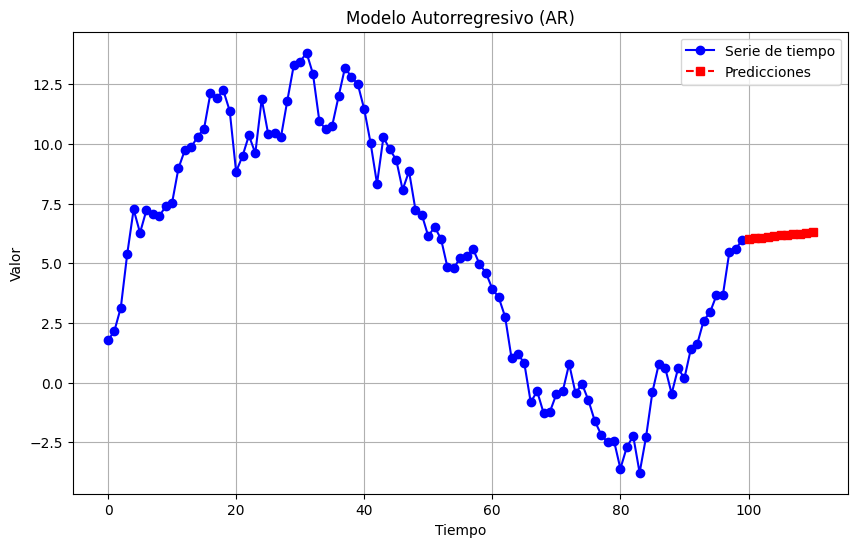

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Crear una serie de tiempo sintética
np.random.seed(0)
n = 100
valores = np.random.randn(n).cumsum()
serie_tiempo = pd.Series(valores)

# Ajustar el modelo AR
modelo_ar = AutoReg(serie_tiempo, lags=1)
modelo_fit = modelo_ar.fit()

# Generar predicciones
predicciones = modelo_fit.predict(start=len(serie_tiempo), end=len(serie_tiempo) + 10)

# Graficar la serie de tiempo y las predicciones con personalización
plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo, marker='o', linestyle='-', color='b', label='Serie de tiempo')
plt.plot(predicciones.index, predicciones, marker='s', linestyle='--', color='r', label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Modelo Autorregresivo (AR)')

# Personalizaciones adicionales
plt.grid(True)  # Mostrar cuadrícula

# Mostrar la leyenda en la mejor posición
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()

En este ejemplo, generamos una serie de tiempo sintética utilizando valores aleatorios generados por la función `np.random.randn` y los acumulamos utilizando `cumsum`. Luego, ajustamos un modelo `AR` utilizando `AutoReg` y especificamos `lags=1` para indicar que se utilizará solo el valor anterior para predecir el siguiente.

El método `fit` ajusta el modelo `AR` a la serie de tiempo y devuelve un objeto `AutoRegResults`. Utilizamos el método `predict` para generar predicciones para los próximos 10 valores.

Finalmente, graficamos la serie de tiempo original y las predicciones generadas por el modelo `AR`.

Es importante tener en cuenta que el orden del modelo `AR` (`p`) y la cantidad de lags utilizados pueden variar según la serie de tiempo y deben ajustarse adecuadamente para obtener resultados precisos. Además, en aplicaciones prácticas, es común realizar una validación cruzada y evaluar la calidad de las predicciones utilizando métricas como el error cuadrático medio (`MSE`) o el error absoluto medio (`MAE`).

## **Modelo de media móvil (AR)**

Un Modelo de Media Móvil (MA) es otro tipo de modelo utilizado en el análisis de series de tiempo. A diferencia del modelo AR, que utiliza valores pasados de la propia serie de tiempo, el modelo MA utiliza los errores pasados (también conocidos como residuos o términos de error) para predecir los valores futuros. El término "media móvil" se refiere al promedio móvil de los errores pasados.

El orden de un modelo `MA` se representa como `MA(q)`, donde "`q`" indica la cantidad de errores pasados utilizados para predecir el siguiente valor. Cada error pasado se multiplica por un coeficiente y la suma ponderada de estos errores se utiliza para hacer la predicción.

A continuación, se presenta un ejemplo de cómo implementar un modelo `MA` utilizando el paquete `statsmodels` en Python:

/home/puma/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


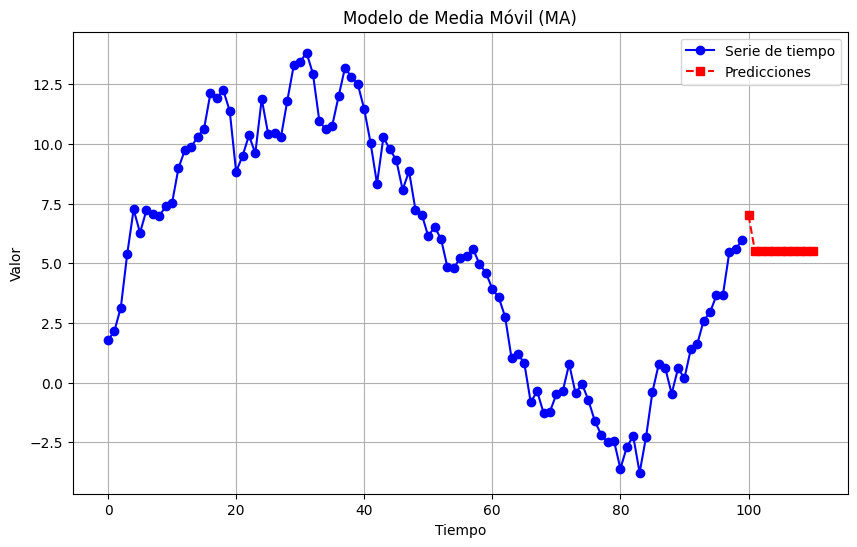

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Crear una serie de tiempo sintética
np.random.seed(0)
n = 100
valores = np.random.randn(n).cumsum()
serie_tiempo = pd.Series(valores)

# Ajustar el modelo MA
modelo_ma = ARIMA(serie_tiempo, order=(0, 0, 1))
modelo_fit = modelo_ma.fit()

# Generar predicciones
predicciones = modelo_fit.predict(start=len(serie_tiempo), end=len(serie_tiempo) + 10)

# Graficar la serie de tiempo y las predicciones con personalización
plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo, marker='o', linestyle='-', color='b', label='Serie de tiempo')
plt.plot(predicciones.index, predicciones, marker='s', linestyle='--', color='r', label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Modelo de Media Móvil (MA)')

# Personalizaciones adicionales
plt.grid(True)  # Mostrar cuadrícula

# Mostrar la leyenda en la mejor posición
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()

En este ejemplo, generamos una serie de tiempo sintética utilizando valores aleatorios generados por la función `np.random.randn` y los acumulamos utilizando `cumsum`. Luego, ajustamos un modelo `MA` utilizando `ARIMA` y especificamos el orden como order=(0, 0, 1) para indicar que se utilizará solo un error pasado para predecir el siguiente.

El método `fit` ajusta el modelo `MA` a la serie de tiempo y devuelve un objeto `ARIMAResults`. Utilizamos el método `predict` para generar predicciones para los próximos 10 valores.

Finalmente, graficamos la serie de tiempo original y las predicciones generadas por el modelo `MA`.

Al igual que con el modelo `AR`, es importante ajustar adecuadamente el orden del modelo `MA` (`q`) y realizar una validación cruzada para evaluar la calidad de las predicciones utilizando métricas adecuadas.

## **Modelo autorregresivo y de media móvil integrado (ARIMA)**

El modelo autorregresivo y de media móvil integrado (ARIMA, por sus siglas en inglés) es un modelo ampliamente utilizado para analizar y predecir series de tiempo. Combina componentes de un modelo autorregresivo (AR) y un modelo de media móvil (MA), junto con una componente de integración (I).

El modelo ARIMA se utiliza para modelar series de tiempo estacionarias o series de tiempo que se pueden convertir en estacionarias mediante diferenciación. La estacionariedad implica que las propiedades estadísticas de la serie de tiempo, como la media y la varianza, no cambian con el tiempo.

El modelo ARIMA se define mediante tres parámetros principales: `p`, `d` y `q`.

* El parámetro `p` representa el orden del modelo autorregresivo y captura la dependencia lineal de la serie de tiempo actual en sus valores pasados. Indica cuántos períodos anteriores se utilizan en la predicción. Un valor más alto de `p` indica una dependencia más larga en el pasado.

* El parámetro `d` representa el grado de diferenciación necesario para convertir la serie de tiempo en estacionaria. Si la serie de tiempo no es estacionaria, la diferenciación se realiza restando el valor actual del valor anterior. El valor de `d` indica cuántas veces se debe realizar esta diferenciación. Un valor de `d` más alto indica que se requiere una mayor diferenciación.

* El parámetro `q` representa el orden del modelo de media móvil y captura la dependencia lineal de la serie de tiempo actual en los errores pasados. Indica cuántos períodos anteriores de los errores del modelo se utilizan en la predicción. Un valor más alto de `q` indica una dependencia más larga en los errores pasados.

A continuación se muestra un ejemplo de cómo utilizar el modelo ARIMA en Python para ajustar una serie de tiempo y generar predicciones:

/home/puma/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


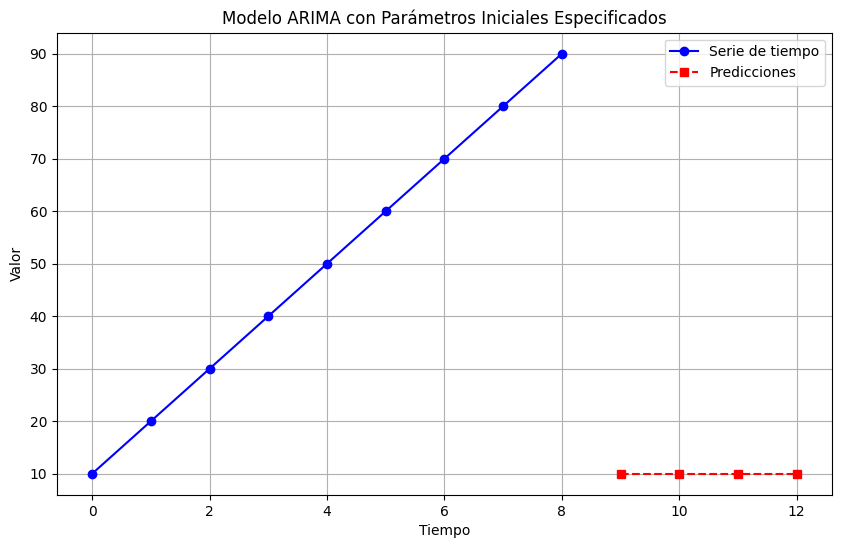

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Crear una serie de tiempo sintética
serie_tiempo = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90])

# Ajustar el modelo ARIMA
modelo = ARIMA(serie_tiempo, order=(1, 1, 1))
modelo_fit = modelo.fit(start_params=[0, 0, 0])  # Especificar manualmente los parámetros iniciales

# Generar predicciones
predicciones = modelo_fit.predict(start=len(serie_tiempo), end=len(serie_tiempo) + 3)

# Graficar la serie de tiempo y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo, marker='o', linestyle='-', color='b', label='Serie de tiempo')
plt.plot(predicciones.index, predicciones, marker='s', linestyle='--', color='r', label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Modelo ARIMA con Parámetros Iniciales Especificados')
plt.grid(True)
plt.legend(loc='best')
plt.show()

En este ejemplo, se crea una serie de tiempo sintética y se ajusta un modelo ARIMA con un orden de (1, 1, 1). Esto significa que se utiliza un modelo autorregresivo de orden 1 (`p=1`), una diferenciación de primer orden (`d=1`) y un modelo de media móvil de orden 1 (`q=1`). Luego se generan predicciones para los próximos 4 períodos y se grafican junto con la serie de tiempo original.

Es importante tener en cuenta que el ajuste de un modelo ARIMA requiere ciertas suposiciones, como la estacionariedad de la serie de tiempo. Además, es posible que sea necesario realizar ajustes adicionales, como la selección de órdenes `p`, `d` y `q` óptimos, la verificación de la validez de los residuos y la evaluación de la calidad de las predicciones.

El modelo ARIMA es una herramienta poderosa para analizar y predecir series de tiempo, pero su correcta aplicación requiere una comprensión sólida de los conceptos y técnicas asociados con el modelado de series de tiempo. Se recomienda consultar recursos adicionales y buscar orientación experta para obtener una comprensión más profunda y una aplicación adecuada del modelo ARIMA.






| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./2.MODELOS_DE_SUAVIZAMIENTO.ipynb)| [⏩](./4.OTROS_METODOS.ipynb)|